In [10]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

In [29]:
parent_path = ".."
data_folder = "data"
#type_of_data = "Clinical_data"
type_of_data = "t_elec_15"
#type_of_data = "t_elec_13"
folder_name = "MarRi_2_0001.vhdr"
#folder_name = "clinical.vhdr"
sample_data_raw_file = os.path.join(parent_path, data_folder, type_of_data,
                                    folder_name)
print(sample_data_raw_file)

../data/t_elec_15/MarRi_2_0001.vhdr


In [30]:
raw = mne.io.read_raw_brainvision(sample_data_raw_file,preload=True)

Extracting parameters from ../data/t_elec_15/MarRi_2_0001.vhdr...
Setting channel info structure...
Reading 0 ... 330549  =      0.000 ...   132.220 secs...


In [31]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: CzOz, T7Cz, Fp1Fp2, refCz, refT7, refOz, refFp1, sT7sCz
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2017-11-13 13:24:06 UTC
 nchan: 8
 projs: []
 sfreq: 2500.0 Hz
>


In [32]:
events = mne.find_events(raw, stim_channel='CzOz')
raw.drop_channels(raw.ch_names[1:])

<RawBrainVision | MarRi_2_0001.eeg, 1 x 330550 (132.2 s), ~2.5 MB, data loaded>

In [33]:
data = raw.filter(l_freq=8,h_freq=12,method="iir")
print(data.info)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 12.00 Hz: -6.02, -6.02 dB

<Info | 7 non-empty values
 bads: []
 ch_names: CzOz
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 12.0 Hz
 meas_date: 2017-11-13 13:24:06 UTC
 nchan: 1
 projs: []
 sfreq: 2500.0 Hz
>


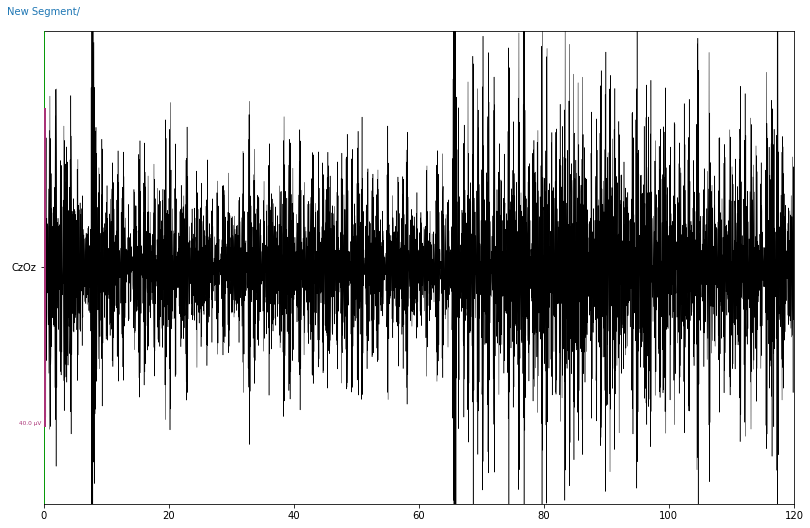

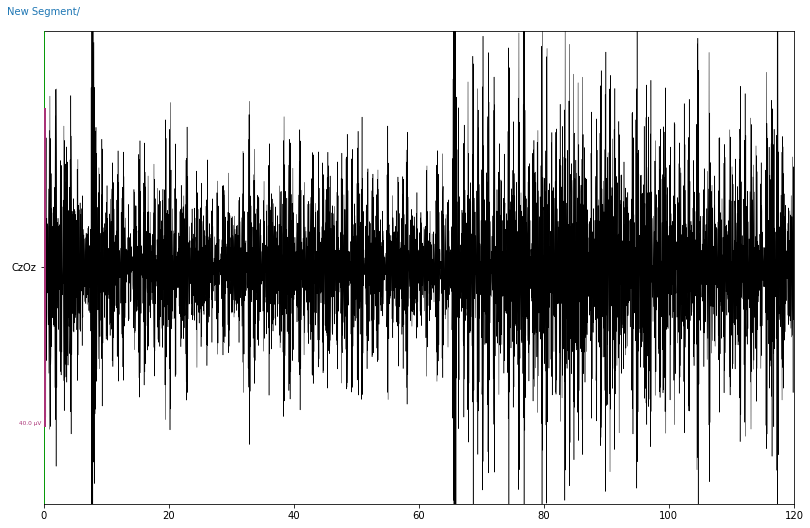

In [34]:
data.plot(events=events, block=True,duration=120,start=0,show_scrollbars=False,show_scalebars=True)

In [36]:
raw_selection = data[0,:]

In [37]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(200, 50), dpi=90, facecolor='w', edgecolor='k')
x = raw_selection[1]
y = raw_selection[0].T


<Figure size 18000x4500 with 0 Axes>

In [42]:
from mne.preprocessing import peak_finder
peak_locs, peak_mags = peak_finder(y.flatten(),extrema=-1)
print(peak_locs)

Found 213 significant peaks
[   534    811   2342   2604   2861   4730   4983   6737   8193   8461
  10723  10982  19104  19357  19615  19917  20198  20469  20753  21013
  23395  38132  38383  40406  48778  50513  50768  56967  57226  79826
  82010  82258  82505  95981  96235  98035  98293  98552 102291 102549
 107799 121260 123149 123393 125612 127173 127420 145086 145333 163533
 163799 164069 164328 164586 164853 165810 166058 168029 169545 169790
 171496 171742 171988 173585 173839 175294 175555 175813 177447 177702
 177954 178207 179990 180239 182019 185779 186028 186279 187999 189892
 190148 190408 191856 192098 192341 195673 195919 197481 199014 199275
 199527 200888 201145 201398 203105 204636 204893 206408 206656 207520
 208149 208393 208639 209931 210184 210434 211770 212017 212262 213570
 213812 215280 215539 215785 219022 220902 221155 222584 222831 223077
 224427 224673 224915 225570 226457 226712 228253 228500 230111 235151
 235399 235644 236931 237175 237413 237642 240010

In [43]:
peak_locs, peak_mags = peak_finder(y.flatten(),extrema=1)
print(peak_locs)

Found 214 significant peaks
[    70    674    946   2474   2733   4600   4857   5108   8063   8325
  10591  10852  18979  19230  19484  19755  20063  20332  20613  20885
  21139  29755  38256  40283  48650  50384  50641  50895  57097  57355
  81887  82134  82382  95855  96108  96363  98164  98423 102164 102419
 107672 121135 121384 123272 125487 125737 127296 137590 145209 145459
 163664 163935 164199 164456 164717 164995 165935 167902 168159 169667
 169912 171619 171865 173458 173712 173967 175425 175684 175943 177575
 177828 178081 179865 180115 180364 185657 185903 186153 187875 189765
 190020 190276 191738 191977 192220 192460 195796 196043 197612 199147
 199402 200761 201017 201273 202984 203226 204765 205019 206532 207397
 207643 208271 208516 208759 210057 210310 210556 211893 212140 213453
 213690 213936 215412 215664 218895 219147 221030 222461 222708 222955
 224305 224551 224795 225447 226328 226585 228127 228377 229987 230233
 235275 235522 236809 237054 237295 237529 237756

In [45]:
import pandas as pd

numbers = y.flatten()

window_size = 500


numbers_series = pd.Series(numbers)

windows = numbers_series.rolling(window_size)
print(windows)

Rolling [window=500,center=False,axis=0]
